In [4]:
import numpy as np
from sklearn.datasets import load_diabetes
import seaborn as sns

In [5]:
X,y = load_diabetes(return_X_y=True)

In [32]:
X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [7]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [8]:
y.shape

(442,)

In [9]:
# Using sklearn regression

from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

In [11]:
print(X_train.shape)
X_test.shape

(353, 10)


(89, 10)

In [12]:
y_train
y_test.shape

(89,)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
reg = LinearRegression()

In [15]:
reg.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred = reg.predict(X_test)

In [17]:
y_pred

array([154.1235067 , 204.81721599, 124.92988001, 106.09339576,
       258.53035681, 256.32953702, 118.75258786, 119.52147402,
       101.50717468, 190.54137158, 141.70360267, 172.51631204,
       174.34089304, 134.81184017, 294.13950798,  94.11403289,
       211.97052873, 156.49984762, 134.20709632, 119.62534726,
       148.88045343, 165.00378118, 151.09977307, 176.03719872,
       133.27651748, 221.29531227, 197.17482787,  96.15923158,
        50.26531577, 230.48342249, 242.06266394, 114.1153262 ,
        67.0785352 ,  94.53179042, 201.21593262, 167.05306138,
       159.87838519, 192.78601513, 114.49291816, 233.4825497 ,
       140.82309666, 121.06814332, 192.27431013, 191.13157307,
       179.1698153 , 148.35140027, 163.47610288, 276.81203359,
       100.17813072, 164.11265163, 255.81074398, 136.94979051,
       152.37507828, 107.92662528, 194.21661635,  77.35015426,
       118.50951725,  68.38527563, 154.29094022, 162.48905632,
       168.36590928, 156.8764705 ,  97.13958436, 238.17

In [18]:
from sklearn.metrics import r2_score

In [19]:
r2_score(y_test,y_pred)

0.4399387660024645

In [20]:
reg.coef_

array([  -9.16088483, -205.46225988,  516.68462383,  340.62734108,
       -895.54360867,  561.21453306,  153.88478595,  126.73431596,
        861.12139955,   52.41982836])

In [21]:
reg.intercept_

151.88334520854633

In [22]:
class MyLr():
    
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self,X_train,y_train):
        X_train =  np.insert(X_train,0,1,axis = 1)
        
        #calculate the coeff
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
    
    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_)+self.intercept_
        return y_pred
    

In [23]:
mylr = MyLr()

In [24]:
mylr.fit(X_train,y_train)

In [25]:
y_pred = mylr.predict(X_test)

In [26]:
r2_score(y_test,y_pred)

0.43993876600246484

In [27]:
mylr.coef_

array([  -9.16088483, -205.46225988,  516.68462383,  340.62734108,
       -895.54360867,  561.21453306,  153.88478595,  126.73431596,
        861.12139955,   52.41982836])

In [28]:
mylr.intercept_

151.8833452085463

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

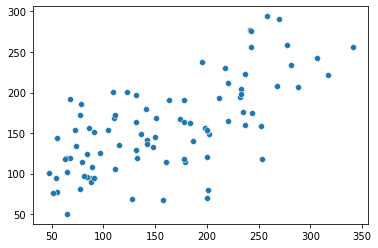

In [31]:
sns.scatterplot(y_test,y_pred)